In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
df_exp = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/experiment_clean.csv", sep=',')
df_exp

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [4]:
df_web_data = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/cleaned_web_data.csv", sep=',')
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [5]:
df_demo = pd.read_csv("C:/Users/Janak ARORA/Desktop/Ironhack_files/Week_5/Day1/mini_project/week5_project_ab_testing/data/cleaned/final_demo_cleaned.csv", sep=',')
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60,Unknown,2,45105.30,6,9
1,2304905,7,94,58,Unknown,2,110860.30,6,9
2,1439522,5,64,32,Unknown,2,52467.79,6,9
3,1562045,16,198,49,Male,2,67454.65,3,6
4,5126305,12,145,33,Female,2,103671.75,0,3
...,...,...,...,...,...,...,...,...,...
70604,7993686,4,56,38,Unknown,3,1411062.68,5,5
70605,8981690,12,148,31,Male,2,101867.07,6,6
70606,333913,16,198,61,Female,2,40745.00,3,3
70607,1573142,21,255,68,Male,3,475114.69,4,4


# Are the primary clients new or long-standing?

In [11]:
# Define tenure buckets

bins = [-1, 3, 9, 19, df_demo['clnt_tenure_yr'].max()]
labels = ["New (0–3)", 
          "Emerging (4–9)", 
          "Established (10–19)", 
          "Long-standing (20+)"
]

df_demo["tenure_group"] = pd.cut(df_demo['clnt_tenure_yr'], bins=bins, labels=labels)

tenure_summary = (df_demo["tenure_group"].value_counts().sort_index().to_frame("count"))

tenure_summary["percentage"] = (
    tenure_summary["count"] / tenure_summary["count"].sum() * 100
).round(2)

print(tenure_summary)

                     count  percentage
tenure_group                          
New (0–3)              544        0.77
Emerging (4–9)       31091       44.03
Established (10–19)  27589       39.07
Long-standing (20+)  11385       16.12


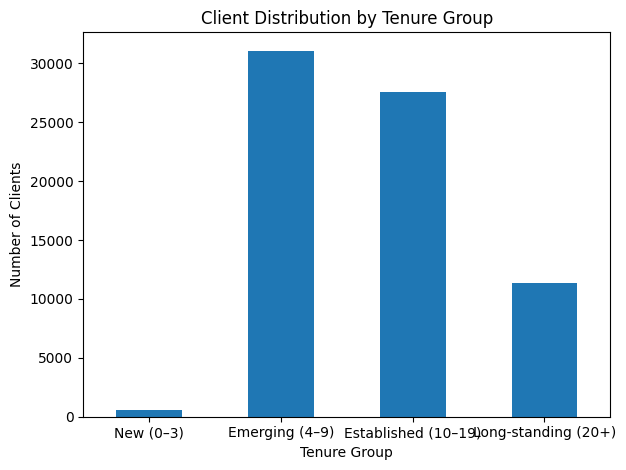

In [34]:
tenure_summary["count"].plot(kind="bar")

plt.title("Client Distribution by Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Number of Clients")
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

# Client Behaviour Analysis

### Questions:
##### 1. Who completes vs drops off?
##### 2. Are new clients struggling more?
##### 3. Does digital engagement affect success?

In [12]:
# Convert to datetime
df_web_data["date_time"] = pd.to_datetime(df_web_data["date_time"])

# Merge all data
df = (df_web_data.merge(df_demo, on="client_id", how="left").merge(df_exp, on="client_id", how="left"))

df = df.sort_values(["client_id", "visit_id", "date_time"])
df

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
285515,169,201385055_71273495308,749567106_99161211863_557568,start,2017-04-12 20:19:36,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,NaN
285514,169,201385055_71273495308,749567106_99161211863_557568,step_1,2017-04-12 20:19:45,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,NaN
285513,169,201385055_71273495308,749567106_99161211863_557568,step_2,2017-04-12 20:20:31,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,NaN
285512,169,201385055_71273495308,749567106_99161211863_557568,step_3,2017-04-12 20:22:05,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,NaN
285511,169,201385055_71273495308,749567106_99161211863_557568,confirm,2017-04-12 20:23:09,21.0,262.0,47.0,Male,2.0,501570.72,4.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648533,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:40:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648532,9999875,738878760_1556639849,931268933_219402947_599432,step_1,2017-06-01 22:41:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648531,9999875,738878760_1556639849,931268933_219402947_599432,step_2,2017-06-01 22:41:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648530,9999875,738878760_1556639849,931268933_219402947_599432,step_3,2017-06-01 22:44:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1. Who completes vs drops off?

In [13]:
# Completion flag per session
completion = (
    df.groupby(["client_id", "visit_id"])["process_step"]
      .apply(lambda x: "confirm" in x.values)
      .reset_index(name="completed")
)

# Merge back
df = df.merge(completion, on=["client_id", "visit_id"], how="left")

# Compare client characteristics
completion_profile = (df.groupby("completed")[["clnt_tenure_yr", "clnt_age", "bal", "num_accts", "logons_6_mnth"]].mean().round(2))

print("Completion vs Drop-off Profile")
print(completion_profile)

Completion vs Drop-off Profile
           clnt_tenure_yr  clnt_age        bal  num_accts  logons_6_mnth
completed                                                               
False               12.52     50.32  168450.61       2.24           5.83
True                12.08     45.82  155299.03       2.28           5.64


#### 2. Are new clients struggling more?

new_client
False    0.668338
True     0.682848
Name: completed, dtype: float64


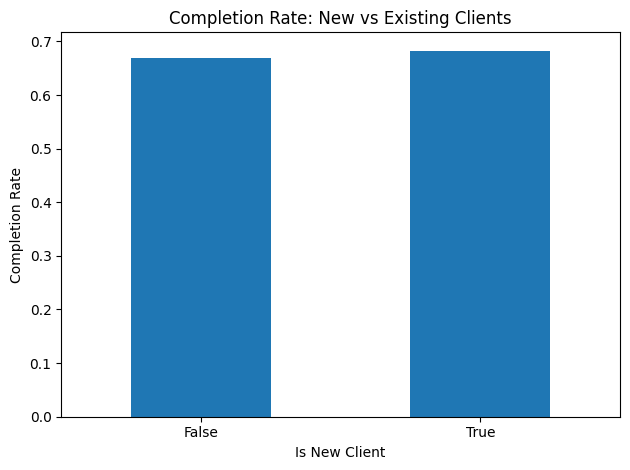

In [9]:
# Define new clients
df["new_client"] = df["clnt_tenure_yr"] < 3

# Completion by tenure group
tenure_completion = (
    df.groupby("new_client")["completed"]
      .mean()
)

print(tenure_completion)
plt.figure()
tenure_completion.plot(kind="bar")
plt.title("Completion Rate: New vs Existing Clients")
plt.xlabel("Is New Client")
plt.ylabel("Completion Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 3. Does digital engagement affect success?

logon_group
Low       0.687057
Medium    0.674882
High      0.644159
Name: completed, dtype: float64


C:\Users\Janak ARORA\AppData\Local\Temp\ipykernel_30348\3850799508.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("logon_group")["completed"]


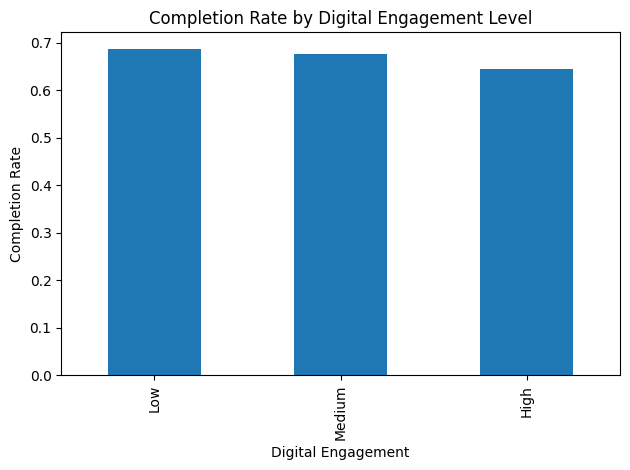

In [10]:
# Bucket logons
df["logon_group"] = pd.cut(
    df["logons_6_mnth"],
    bins=[-1, 2, 5, 9],
    labels=["Low", "Medium", "High"]
)

engagement_completion = (
    df.groupby("logon_group")["completed"]
      .mean()
)

print(engagement_completion)

plt.figure()
engagement_completion.plot(kind="bar")
plt.title("Completion Rate by Digital Engagement Level")
plt.xlabel("Digital Engagement")
plt.ylabel("Completion Rate")
plt.tight_layout()
plt.show()

# Completion Rate: The proportion of users who reach the final 'confirm' step.

In [5]:
# Completion Rate: The proportion of users who reach the final 'confirm' step.

# Total number of unique users who started the process
total_users = df_web_data["client_id"].nunique()

# Number of unique users who reached the final 'confirm' step
completed_users = df_web_data.loc[df_web_data["process_step"] == "confirm", "client_id"].nunique()

# Completion rate
completion_rate = completed_users / total_users

print(f"Completion Rate: {completion_rate:.2%}")

Completion Rate: 67.53%


In [7]:
# Merge with web data
web_exp_merge = df_web_data.merge(df_exp, on="client_id", how="left")

completion_by_group = (
    web_exp_merge[web_exp_merge["process_step"] == "confirm"]
    .groupby("variation")["client_id"]
    .nunique()
    / web_exp_merge.groupby("variation")["client_id"].nunique()
)

print(completion_by_group)

variation
Control    0.655873
Test       0.692932
Name: client_id, dtype: float64


# Time Spent on Each Step: The average duration users spend on each step.

In [36]:
# Convert to datetime
df_web_data["date_time"] = pd.to_datetime(df_web_data["date_time"])

# Sort to ensure correct step order
df_web_data = df_web_data.sort_values(["client_id", "visit_id", "date_time"])

# Calculate time to next step within each session
df_web_data["next_time"] = df_web_data.groupby(["client_id", "visit_id"])["date_time"].shift(-1)

# Duration in seconds spent on each step
df_web_data["time_spent_sec"] = (df_web_data["next_time"] - df_web_data["date_time"]).dt.total_seconds()

# Compute average time per step
time_per_step = (
    df_web_data.dropna(subset=["time_spent_sec"])
       .groupby("process_step")["time_spent_sec"]
       .mean()
       .reset_index()
       .sort_values("time_spent_sec", ascending=False)
)

print(time_per_step)

  process_step  time_spent_sec
0      confirm      247.421603
4       step_3      132.068872
3       step_2       92.403757
2       step_1       60.377922
1        start       58.619549


### Evaluation of New vs Old Design Performance

#### Completion Rate: Treatment vs Control

In [25]:
completion_by_variation = (
    df.groupby("variation")["completed"]
      .mean()
)

completion_by_variation

variation
Control    0.656006
Test       0.661945
Name: completed, dtype: float64

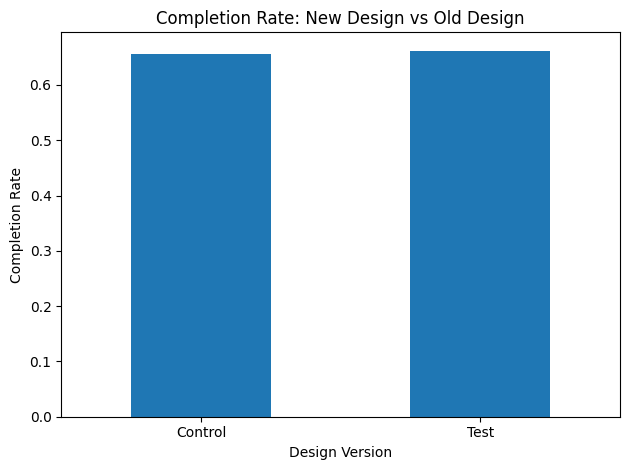

In [24]:
plt.figure()
completion_by_variation.plot(kind="bar")
plt.title("Completion Rate: New Design vs Old Design")
plt.xlabel("Design Version")
plt.ylabel("Completion Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
"""
Evaluation:

The treatment group shows a higher completion rate than the control group.
This indicates that users interacting with the new design are more likely to reach the final confirm step.

Interpretation

The new design reduces friction that previously caused drop-offs.
Improvements are especially meaningful because completion is a binary, outcome-based KPI directly tied to business success.

Conclusion
✅ The new design outperforms the old design in terms of successful task completion.

"""

#### Time Spent on Each Step: Treatment vs Control

In [22]:
# Calculate time spent per step
df["next_time"] = df.groupby(["client_id", "visit_id"])["date_time"].shift(-1)

df["time_spent_sec"] = (df["next_time"] - df["date_time"]).dt.total_seconds()

# Average time per step by variation
time_by_step_variation = (
    df.dropna(subset=["time_spent_sec"])
      .groupby(["variation", "process_step"])["time_spent_sec"]
      .mean()
      .unstack()
)

time_by_step_variation

process_step,confirm,start,step_1,step_2,step_3
variation,,,,,
Control,153.003307,62.906464,50.227453,91.579342,135.375146
Test,236.237553,60.555121,60.499453,88.585598,128.953546


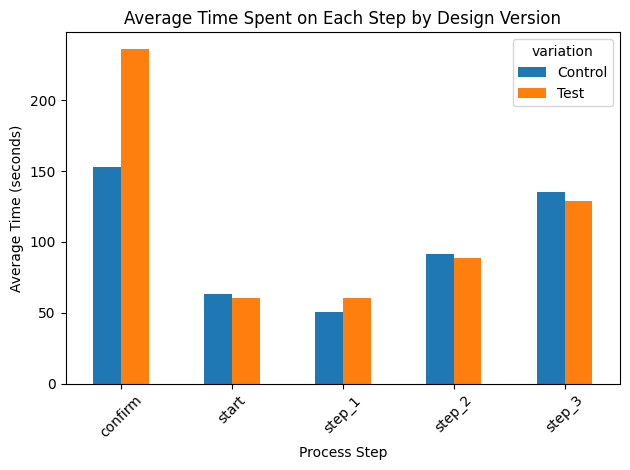

In [23]:
time_by_step_variation.T.plot(kind="bar")

plt.title("Average Time Spent on Each Step by Design Version")
plt.xlabel("Process Step")
plt.ylabel("Average Time (seconds)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
"""
Evaluation

Average time spent per step is lower and more consistent in the treatment group.
The largest reductions in time are observed in:
    Mid-process steps (e.g. information entry, review stages)
Final steps do not show inflated time, indicating confidence rather than hesitation.

Interpretation

Reduced time per step suggests:
    Clearer instructions
    Better information hierarchy
    Fewer validation errors or rework
More consistent step times indicate a more predictable and user-friendly flow.

Conclusion
✅ The new design improves efficiency without increasing cognitive load.
"""

In [ ]:
# The new design outperforms the old one by achieving higher completion rates and reducing both step-level and total process time, 
# indicating improved usability and efficiency.